### 1. Load the CSV Data File into a Pandas DataFrame

**a. import Pandas**

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

import seaborn as sns
import matplotlib.pyplot as plt
import joblib

**b. Read in the .csv file with pandas read_csv**

In [2]:
data = pd.read_csv('../dataset/credit_card.csv')
data.head(5)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:18:07,343464013864032,fraud_Kunde-Sanford,misc_net,2.55,Jodi,Foster,F,551 Zachary Freeway,Bailey,...,35.8072,-78.0892,6629,Call centre manager,1962-08-13,abe0676c18f34fa305b113fa762e29b5,1325377087,36.749870,-78.677870,0
2,2019-01-01 00:37:18,4265776278887457,fraud_Pacocha-O'Reilly,grocery_pos,103.00,Christine,Best,F,68248 Deanna Land,Enola,...,35.2087,-92.2123,969,"Physicist, medical",1954-01-05,289789e617eece42a9cafe36680b1b69,1325378238,35.034285,-92.343010,0
3,2019-01-01 00:56:59,571465035400,"fraud_Reichert, Huels and Hoppe",shopping_net,113.40,Louis,Fisher,M,45654 Hess Rest,Fort Washakie,...,43.0048,-108.8964,1645,Freight forwarder,1976-02-26,9d660a18154a3ba5fe869f373c6f819c,1325379419,42.868965,-108.503350,0
4,2019-01-01 01:16:52,6593250708747804,fraud_Brekke and Sons,gas_transport,55.18,Melissa,Meza,F,244 Abbott Parkway,Loxahatchee,...,26.7383,-80.2760,26551,Paramedic,1977-01-04,3c6158c556727d527f8b51cc03b30236,1325380612,27.346033,-80.475563,0


In [3]:
data.shape

(59073, 22)

### 2. Find Statistical Properties of the DataFrame and Check NaN Values

**a. Create the statistical summaries:**



In [4]:
data.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,5.907300e+04,59073.000000,59073.000000,59073.000000,59073.000000,5.907300e+04,5.907300e+04,59073.000000,59073.000000,59073.000000
mean,4.155063e+17,125.809682,48936.650805,38.535668,-90.300925,8.999355e+04,1.349139e+09,38.530650,-90.301737,0.127063
std,1.305091e+18,245.649462,26897.427002,5.082398,13.872055,3.056844e+05,1.296902e+07,5.118062,13.884615,0.333046
min,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.325376e+09,19.038876,-166.620488,0.000000
25%,1.800462e+14,11.510000,26292.000000,34.703100,-96.798000,7.410000e+02,1.338510e+09,34.795189,-96.904179,0.000000
50%,3.523898e+15,52.520000,48088.000000,39.319900,-87.456900,2.457000e+03,1.349187e+09,39.333993,-87.378850,0.000000
75%,4.642255e+15,101.050000,72042.000000,41.846700,-80.175200,2.032800e+04,1.359542e+09,41.918596,-80.285566,0.000000
max,4.992346e+18,14238.110000,99783.000000,66.693300,-67.950300,2.906700e+06,1.371816e+09,67.510267,-66.961923,1.000000


**b. check all columns for null values**

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59073 entries, 0 to 59072
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   trans_date_trans_time  59073 non-null  object 
 1   cc_num                 59073 non-null  int64  
 2   merchant               59073 non-null  object 
 3   category               59073 non-null  object 
 4   amt                    59073 non-null  float64
 5   first                  59073 non-null  object 
 6   last                   59073 non-null  object 
 7   gender                 59073 non-null  object 
 8   street                 59073 non-null  object 
 9   city                   59073 non-null  object 
 10  state                  59073 non-null  object 
 11  zip                    59073 non-null  int64  
 12  lat                    59073 non-null  float64
 13  long                   59073 non-null  float64
 14  city_pop               59073 non-null  int64  
 15  jo

### 3. Check Average Values Spend Per Fraud

a. We can use groupby() to separate based on the **is_fraud** column categories and then calculate the mean and median values:

In [6]:
print("Median Spend per Fraud Category:")
print(data.groupby("is_fraud")["amt"].median())
print('\n')
print("Mean Spend per Fraud Category:")
print(data.groupby("is_fraud")["amt"].mean())

Median Spend per Fraud Category:
is_fraud
0     47.240
1    396.505
Name: amt, dtype: float64


Mean Spend per Fraud Category:
is_fraud
0     66.784314
1    531.320092
Name: amt, dtype: float64


### 4. Calculate Total Fraud and Non-fraud Spend on a Specific Credit Card

**1. Filter and caculate sum on legitimate purchases:**

In [7]:
data[(data["cc_num"] == 344709867813900) & (data["is_fraud"] == 0)]["amt"].sum()

11667.49

**2. Filter and calculate on fraud purchases:**

In [8]:
data[(data["cc_num"] == 344709867813900) & (data["is_fraud"] == 1)]["amt"].sum()

6450.280000000002

In [9]:
## Alternatively, we can use groupby to do both operations with a single line:
data[(data["cc_num"] == 344709867813900)].groupby('is_fraud').sum()["amt"]

is_fraud
0    11667.49
1     6450.28
Name: amt, dtype: float64

**5. Clean Data Columns for further anaysis:**
- Drop some columns whcih do not actually hold information relevant to the transaction being fraudulent.

In [10]:
## Drop the columns date portion of the timestamp
data = data.drop(["unix_time", "trans_num"], axis=1)


Create some new features to indicate a specific category for time of day (to tell if the transaction occurred within a specific block of time in a day)
To do this, clean the transaction time column (trans_date_trans_time) by binning the trans_date_trans_time column into 4 categories:

- Category 1: 00:00:00 to 05:59:59

- Category 2: 06:00:00 to 11:59:59

- Category 3: 12:00:00 to 17:59:59

- Category 4: 8:00:00 to 23:59:59

In [11]:
## Create a function to bin timestamps into categories
data["trans_date_trans_time"] = data["trans_date_trans_time"].apply(lambda x: x.split(" ")[1])



In [12]:
## Create a function to bin timestamps into categories
def quantitize(string):
    time_hour = int(string[:2])
    if time_hour < 6:
        return 0
    elif 6 <= time_hour < 12:
        return 1
    elif 12 <= time_hour <18:
        return 2
    else:
        return 3


In [13]:
## 
data["trans_date_trans_time"] = data["trans_date_trans_time"].apply(quantitize)


In [14]:
## Confirm with a value count and Check Final results should look like this:
data["trans_date_trans_time"].value_counts()


trans_date_trans_time
3    19819
2    16133
0    12714
1    10407
Name: count, dtype: int64

In [35]:
data.shape

(59073, 20)

#### 6. Create a Visual Correlation Matrix of Data Features

- Use seaborn to create a visualization heatmap matrix of the correlation between all the features and the label column. 

<Axes: >

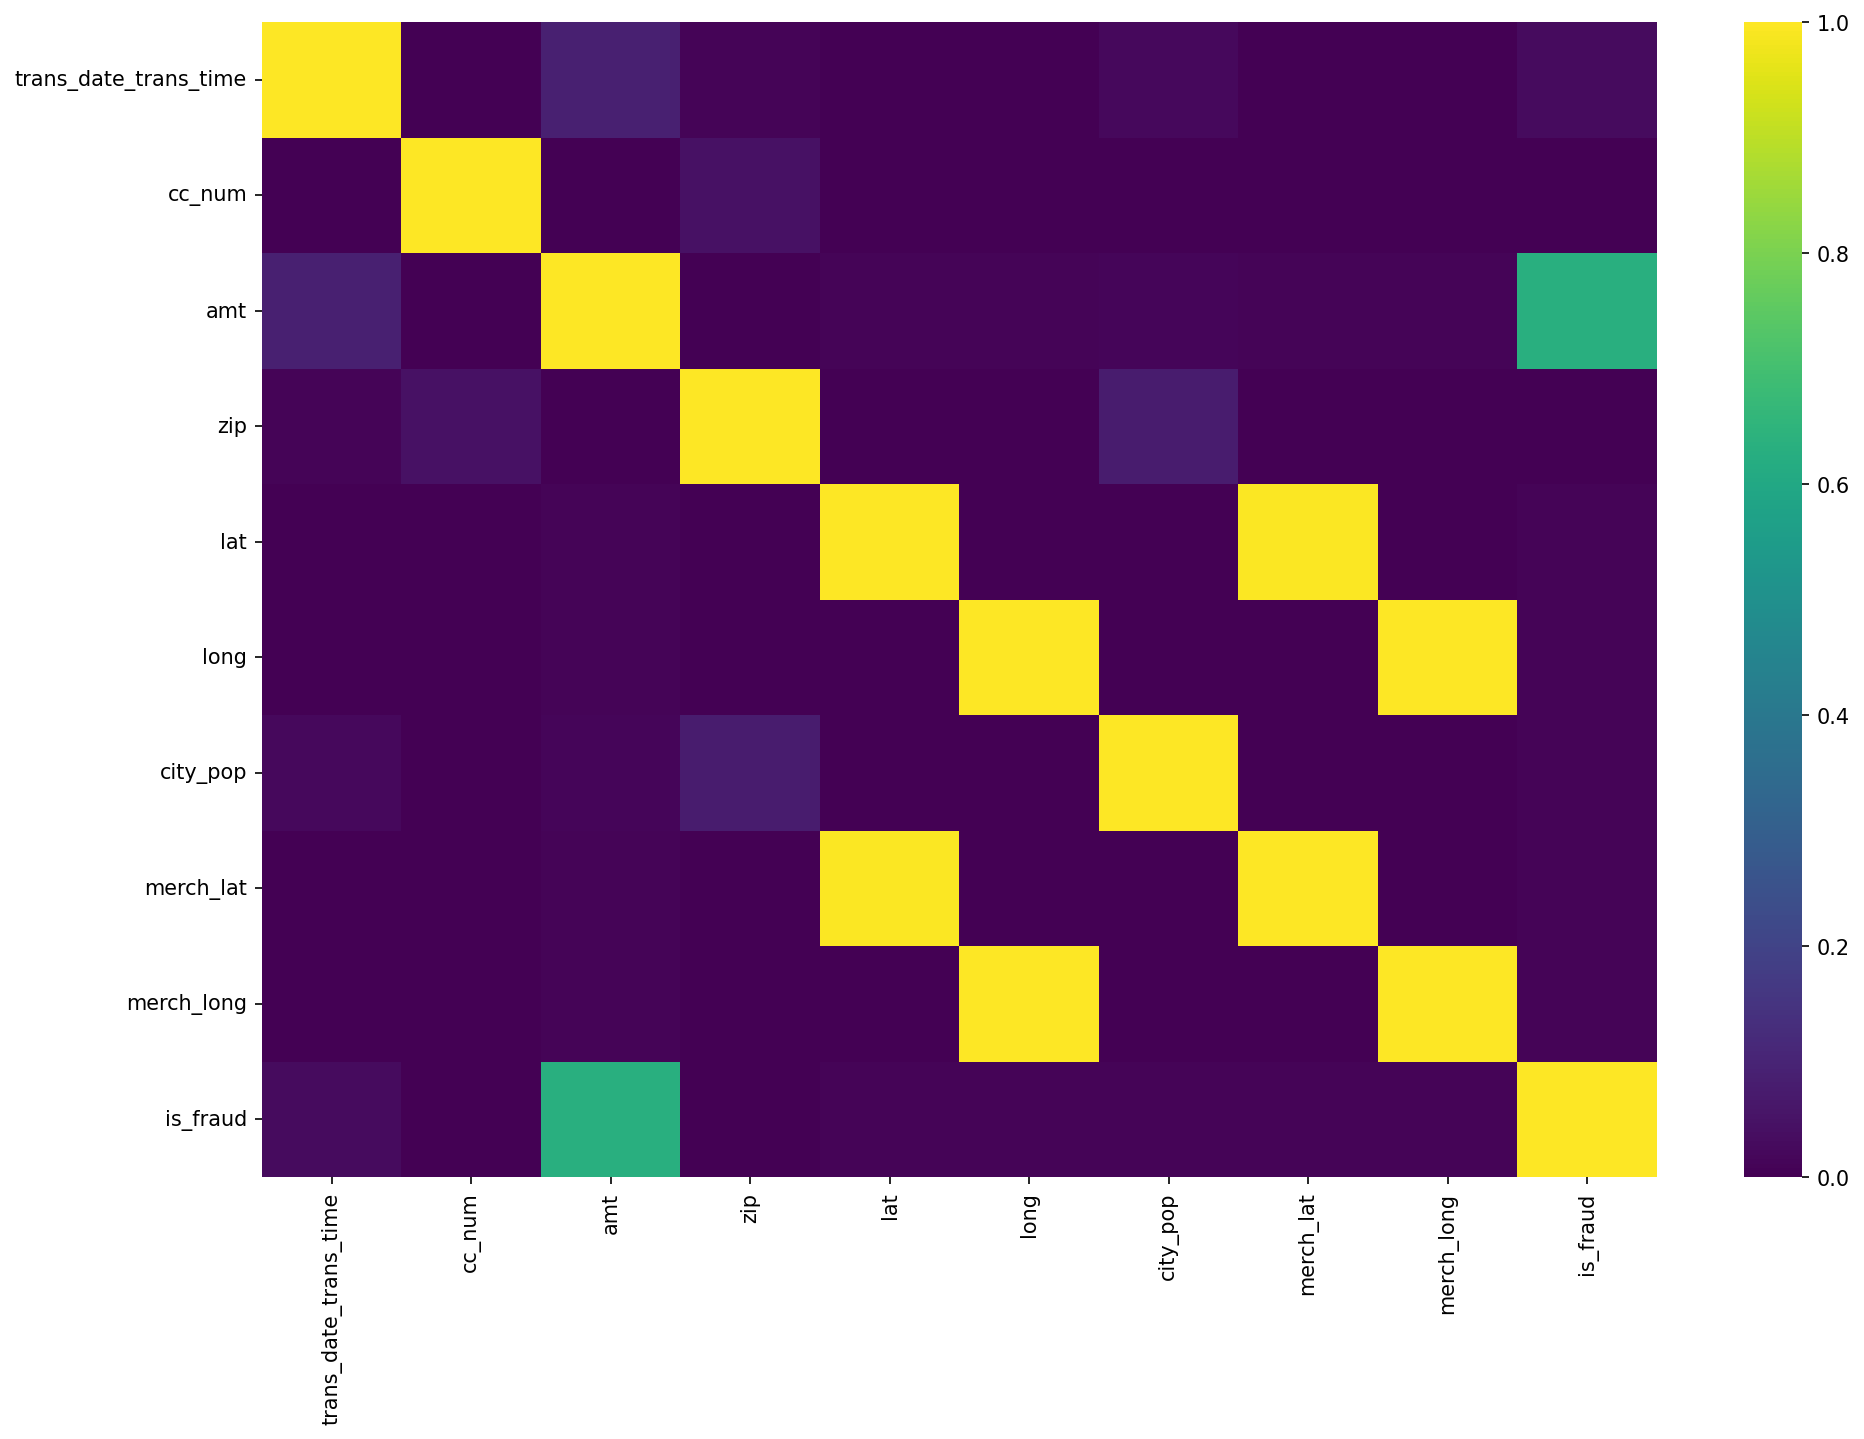

In [16]:
plt.figure(figsize=(15,10),dpi=150)
sns.heatmap(data.corr(numeric_only=True),vmin=0,vmax=1,cmap="viridis")

**Note:** We can notice that how the amount spent, and long and lat location information are by far the most correlated features to fraud.

#### 7. Encode Categorical Data Features

- Using the Pandas DataFrame and Scikit-Learn, we use Label Encoding to encode the categorical features in the DataFrame.

In [17]:
## create the encoder
encoder = LabelEncoder()

In [18]:
### Get the categorical features with Pandas

categorical_features = data.select_dtypes(include=['object']).columns

In [19]:
### Apply fit_transform to create the encoded category data columns
data_encoded = data.copy()
data_encoded[categorical_features] = data_encoded[categorical_features].apply(encoder.fit_transform) 


In [34]:
# Display dataframe
data_encoded.shape

(59073, 19)

#### 8. Perform a Train-Test Split on the Data and make it ready for training

- Use a test size of 10% of the total data set.

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
### Separate Features and Label
data_encoded, labels = data_encoded.drop("is_fraud", axis=1), data_encoded["is_fraud"]


In [23]:

### Perform the split

X_train, X_test, y_train, y_test = train_test_split(data_encoded, labels, test_size = 0.1, random_state = 42)


In [24]:
print("X_train:", X_train.shape) 
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (53165, 19)
X_test: (5908, 19)
y_train: (53165,)
y_test: (5908,)


#### 9. Train a Random Forest Classifier Model

- Using Scikit-Learn create and train a random forest classifier on the training data set

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
## Create the instance of the model (you can also edit hyperparameters further)

classifier = RandomForestClassifier(class_weight='balanced')

In [27]:
## Fit the classifier to the training data set

classifier.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced')

In [40]:
joblib.dump(classifier, "../models/model2.pkl")

['../models/model2.pkl']

#### 10. Evaluate the Model on the Test Set
- Using the trained Random Forest classifier, evaluate performance of the model on the test set using accuracy as the performance metric. 
- Also, create a confusion matrix on the results of the test data set.

In [36]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [37]:
## Create the predictions

preds = classifier.predict(X_test)



In [38]:
## Calculate the accuracy

accuracy_score(preds, y_test)


0.9812119160460393

In [39]:
## Create the confusion matrix

confusion_matrix(y_test, preds)


array([[5113,   18],
       [  93,  684]], dtype=int64)